### Import packages

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

### Loading Dataset

In [64]:
df = pd.read_csv('housing.csv')

In [65]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Preprocessing

In [66]:
df.shape

(20640, 10)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [69]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [72]:
df.duplicated().sum()

0

###  ordinal Encoding for the column (ocean_proximity)

In [73]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [74]:
df['ocean_proximity']=df['ocean_proximity'].map({"<1H OCEAN": 0,"INLAND": 1,"NEAR OCEAN": 2,"NEAR BAY": 3,"ISLAND": 4})

In [75]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11396,-117.97,33.73,19.0,4154.0,560.0,2130.0,589.0,7.2845,301800.0,0
12088,-117.26,33.86,16.0,1171.0,235.0,659.0,216.0,3.1103,110000.0,1
19900,-119.29,36.32,27.0,1513.0,374.0,839.0,350.0,1.2012,64600.0,1
12214,-117.12,33.49,4.0,21988.0,4055.0,8824.0,3252.0,3.9963,191100.0,0
16117,-122.54,37.74,42.0,2006.0,415.0,1230.0,435.0,4.1786,271100.0,2
9612,-120.47,37.29,16.0,749.0,222.0,1277.0,224.0,1.2054,60900.0,1
4786,-118.32,34.03,47.0,1734.0,453.0,1272.0,438.0,3.1731,121500.0,0
12389,-116.43,33.75,24.0,2596.0,438.0,473.0,237.0,3.7727,500001.0,1
9681,-118.97,37.64,14.0,2284.0,622.0,342.0,137.0,3.0921,87500.0,1
11581,-118.03,33.77,24.0,3810.0,579.0,1818.0,590.0,5.8053,255900.0,0


### Train test split

In [76]:
x= df.drop(['median_house_value'],axis=1)
y = df['median_house_value']

In [77]:
#Converting x and y into array
x = np.array(x)
y = np.array(y)

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(16346, 9)
(4087, 9)
(16346,)
(4087,)


### Scaling

In [80]:
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [81]:
x_train

array([[0.25809717, 0.50797024, 0.25490196, ..., 0.14635751, 0.28984428,
        0.        ],
       [0.47773279, 0.4357067 , 0.62745098, ..., 0.02844927, 0.20074206,
        0.25      ],
       [0.63663968, 0.16790648, 0.47058824, ..., 0.12465055, 0.21820389,
        0.25      ],
       ...,
       [0.60020243, 0.15621679, 0.80392157, ..., 0.05936524, 0.1792458 ,
        0.        ],
       [0.23380567, 0.53453773, 0.21568627, ..., 0.17365565, 0.33020234,
        0.75      ],
       [0.19433198, 0.55154091, 1.        , ..., 0.10623253, 0.23403125,
        0.75      ]])

### Building model (ANN)

In [82]:
model = Sequential([
    #input layer
    Dense(1000, input_shape=(x_train.shape[1],), activation='relu'),
    Dropout(0.2),
    #two hidden layers
    Dense(500, activation='relu'),
    Dropout(0.2),
    Dense(250, activation='relu'),
    #output layer
    Dense(1,activation='linear') # here 1 shows countinuous values
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1000)              10000     
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_10 (Dense)            (None, 500)               500500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_11 (Dense)            (None, 250)               125250    
                                                                 
 dense_12 (Dense)            (None, 1)                 251       
                                                                 
Total params: 636,001
Trainable params: 636,001
Non-tr

##### Total Parameters: The "Total params" section indicates that the model has a total of 636,001 parameters. These are the weights and biases that the model will learn during training.

##### Trainable Parameters: The "Trainable params" section shows that all 636,001 parameters in the model are trainable, meaning they will be updated and adjusted during training to optimize the model's performance.

##### Non-trainable Parameters: The "Non-trainable params" section is typically 0, which means there are no parameters that won't be updated during training.

In [83]:
# Compile the model and set easlystoping
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True)

In [84]:
# fit the model (training)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es], epochs=20, batch_size=50, verbose=1)

Epoch 1/20
327/327 [==============================] - 2s 5ms/step - loss: 24323444736.0000 - mae: 119107.4141 - val_loss: 11158037504.0000 - val_mae: 85214.4453
Epoch 2/20
327/327 [==============================] - 1s 3ms/step - loss: 9195731968.0000 - mae: 75748.3203 - val_loss: 7410292736.0000 - val_mae: 66797.7031
Epoch 3/20
327/327 [==============================] - 1s 3ms/step - loss: 6247303680.0000 - mae: 59466.7344 - val_loss: 6031651328.0000 - val_mae: 57179.5508
Epoch 4/20
327/327 [==============================] - 1s 3ms/step - loss: 5799907840.0000 - mae: 55876.3789 - val_loss: 5923504640.0000 - val_mae: 55003.6055
Epoch 5/20
327/327 [==============================] - 1s 3ms/step - loss: 5642393600.0000 - mae: 54919.4023 - val_loss: 5647182848.0000 - val_mae: 54262.0547
Epoch 6/20
327/327 [==============================] - 1s 3ms/step - loss: 5457015808.0000 - mae: 53799.4766 - val_loss: 5585296384.0000 - val_mae: 52805.0391
Epoch 7/20
327/327 [=============================

### Metrics and Score

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

y_pred = model.predict(x_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mae :", mean_squared_error(y_test,y_pred))
print("mae :", mean_squared_log_error(y_test,y_pred))
print("mae :", r2_score(y_test,y_pred))

128/128 [==============================] - 0s 1ms/step
mae : 47775.83910435749
mae : 4369351414.221694
mae : 0.1343298550111297
mae : 0.6804904094080226


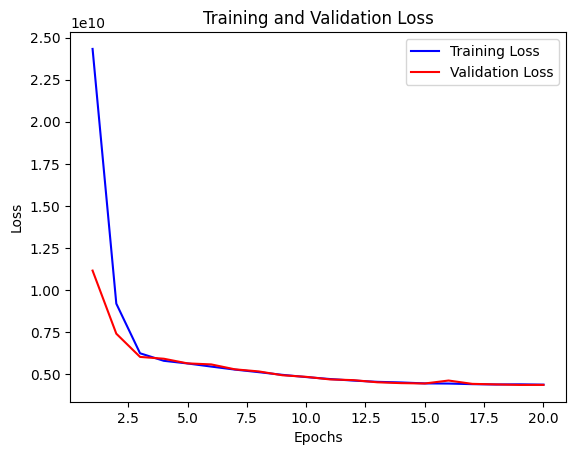

In [86]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()



### Predictive System

In [87]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = min_max_scaler.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]

In [88]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 [==============================] - 0s 17ms/step


In [89]:
price #  452600.0000 # actual value

array([494013.7], dtype=float32)

### Save model

In [90]:
model.save("model_ann.h5")

import pickle 
pickle.dump(min_max_scaler, open('scaler.pkl','wb'))


### Check version 

In [91]:
import sklearn
import tensorflow as tf
import keras

print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

scikit-learn version: 1.3.0
TensorFlow version: 2.10.0
Keras version: 2.10.0
